In [1]:
# from azureml.core import Workspace, Experiment
# ws = Workspace.from_config()

In [2]:
# #TabularDataset directly from datastore
# from azureml.core import Datastore, Dataset

# datastore = Datastore.get(ws, "reviewthebookdatastore")

# tab_ds = Dataset.Tabular.from_delimited_files(
#     path=(datastore, "melb_data.csv")   # (Datastore, relative path in container)
# )

# pandas_df = tab_ds.to_pandas_dataframe()
# pandas_df.head()

In [3]:
# open from local instead of above
import pandas as pd
pandas_df = pd.read_csv('./local_dataset/melb_data.csv')
print("df shape is: ",pandas_df.shape)
pandas_df.head()

df shape is:  (34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
#Increase display of all columns of rows for pandas datasets
import pandas as pd
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)
#create pandas dataframe
raw_df = pandas_df
raw_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
raw_df.shape

(34857, 21)

In [6]:
raw_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [7]:
raw_df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [8]:
# calculate Unique Values, Missing Values Percentage, Percentage of Values in the biggest category and Datatype
stats = []
for cl in raw_df.columns:
   stats.append((cl,
                 raw_df[cl].nunique(),
                 raw_df[cl].isnull().sum(),
                 raw_df[cl].isnull().sum() * 100 / raw_df.shape[0],
                 raw_df[cl].value_counts(normalize=True, dropna=False).values[0] * 100,
                 raw_df[cl].dtype))


# create new dataframe containing the above mentioned stats   
stats_df = pd.DataFrame(stats, columns=['Feature',
                                       'Unique Values',
                                       'Missing Values',
                                       'Missing Values [%]',
                                       'Values in the biggest category [%]',
                                       'Datatype'])


stats_df.sort_values('Missing Values [%]', ascending=False)

,Feature,Unique Values,Missing Values,Missing Values [%],Values in the biggest category [%],Datatype
14,BuildingArea,740,21115,60.576068,60.576068,float64
15,YearBuilt,160,19306,55.386293,55.386293,float64
13,Landsize,1684,11810,33.881286,33.881286,float64
12,Car,15,8728,25.039447,35.040308,float64
11,Bathroom,11,8226,23.599277,37.206300,float64
10,Bedroom2,15,8217,23.573457,34.084976,float64
18,Longtitude,14524,7976,22.882061,22.882061,float64
17,Lattitude,13402,7976,22.882061,22.882061,float64
4,Price,2871,7610,21.832057,21.832057,float64
19,Regionname,8,3,0.008607,33.955877,object


In [9]:
df =raw_df.drop(['Address', "SellerG"], axis=1)

In [10]:
# rename some of the columns
df = df.rename(columns={'Bedroom2': 'Bedrooms',
                        'Bathroom': 'Bathrooms',
                        'Regionname': 'Region',
                        'Car': 'Parking',
                        'Propertycount': 'SuburbPropCount'})
df.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedrooms,Bathrooms,Parking,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,SuburbPropCount
0,Abbotsford,2,h,NaN,SS,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(34814, 19)

In [13]:
df['Method'].unique()

array(['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA'], dtype=object)

In [14]:
df['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [15]:
# Let's replace abbreviations
df = df.replace({'Type': {'h':'house','u':'unit','t':'townhouse'}})
df = df.replace({'Method': {'S':'Property Sold','SP':'Property Sold Prior','PI':'Property Passed In',
                           'VB':'Vendor Bid', 'SA':'Sold After Auction'}})
df.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedrooms,Bathrooms,Parking,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,SuburbPropCount
0,Abbotsford,2,house,NaN,SS,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,2,house,1480000.0,Property Sold,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,house,1035000.0,Property Sold,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,3,unit,NaN,Vendor Bid,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,3,house,1465000.0,Property Sold Prior,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [16]:
df['CouncilArea'].unique()

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Cardinia Shire Council', 'Whittlesea City Council',
       'Frankston City Council', 'Macedon Ranges Shire Council',
       'Yarra Ranges Shire Council', 'Wyndham City Council',
       'Moorabool Shire Council', 'Mitchell Shire Council', nan],
      dtype=object)

In [17]:
df['Suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [18]:
df = df.drop(['Postcode'], axis =1)

In [19]:
df = df.drop(['Date'],axis=1)

In [20]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Bedrooms',
       'Bathrooms', 'Parking', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Region', 'SuburbPropCount'],
      dtype='object')

In [21]:
dist_df = df.describe().T.apply(lambda x: x.apply(lambda x: format(x,'g')))
dist_df

,count,mean,std,min,25%,50%,75%,max
Rooms,34814,3.03111,0.969937,1,2,3,4,16
Price,27235,1.05026e+06,641573,85000,635000,870000,1.295e+06,1.12e+07
Distance,34813,11.1861,6.78772,0,6.4,10.3,14,48.1
Bedrooms,26638,3.08465,0.980726,0,2,3,4,30
Bathrooms,26629,1.62473,0.724187,0,1,2,2,12
Parking,26127,1.72882,1.01081,0,1,2,2,26
Landsize,23045,593.61,3398.99,0,224,521,670,433014
BuildingArea,13740,160.255,401.296,0,102,136,188,44515
YearBuilt,15549,1965.28,37.3273,1196,1940,1970,2000,2106
Lattitude,26879,-37.8106,0.0902813,-38.1904,-37.8629,-37.8076,-37.7541,-37.3902


In [22]:
# Let's add some other information missing to the statistics
from pandas.api.types import is_numeric_dtype
max_count=[]
min_count=[]
mode_count=[]
mode=[]
skew=[]
for cl in df.columns:
    if (is_numeric_dtype(df[cl])):
        max_count.append(df[cl].value_counts(dropna=False).loc[df[cl].max()])
        min_count.append(df[cl].value_counts(dropna=False).loc[df[cl].min()])
        mode_count.append(df[cl].value_counts(dropna=False).loc[df[cl].mode()[0]])
        skew.append(df[cl].skew())
        mode.append(int(df[cl].mode()[0]))

dist_df['mode'] = mode
dist_df['skew'] = skew
dist_df['#values(min)'] = min_count
dist_df['#values(max)'] = max_count
dist_df['#values(mode)'] = mode_count
dist_df

,count,mean,std,min,25%,50%,75%,max,mode,skew,#values(min),#values(max),#values(mode)
Rooms,34814,3.03111,0.969937,1,2,3,4,16,3,0.499780,1477,1,15072
Price,27235,1.05026e+06,641573,85000,635000,870000,1.295e+06,1.12e+07,600000,2.588475,1,1,235
Distance,34813,11.1861,6.78772,0,6.4,10.3,14,48.1,11,1.501423,77,6,1418
Bedrooms,26638,3.08465,0.980726,0,2,3,4,30,3,1.406295,17,1,11879
Bathrooms,26629,1.62473,0.724187,0,1,2,2,12,1,1.356548,46,1,12969
Parking,26127,1.72882,1.01081,0,1,2,2,26,2,2.095173,1631,1,12212
Landsize,23045,593.61,3398.99,0,224,521,670,433014,0,96.018157,2437,1,2437
BuildingArea,13740,160.255,401.296,0,102,136,188,44515,120,99.125823,76,1,185
YearBuilt,15549,1965.28,37.3273,1196,1940,1970,2000,2106,1970,-1.080898,1,1,1490
Lattitude,26879,-37.8106,0.0902813,-38.1904,-37.8629,-37.8076,-37.7541,-37.3902,-37,-0.257612,1,1,25


In [23]:
import plotly.express as px

fig = px.box(df, x="Price", points="all")
fig.show()


In [24]:
import numpy as np
df['Price_log']=np.log(df['Price'])
import plotly.express as px

fig = px.box(df, x="Price_log", points="all")
fig.show()


In [28]:
import plotly.express as px

fig = px.box(df, x="BuildingArea", points="all")
fig.show()


In [29]:
df.loc[raw_df['BuildingArea']>2000]

,Suburb,Rooms,Type,Price,Method,Distance,Bedrooms,Bathrooms,Parking,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,SuburbPropCount,Price_log
2466,Bulleen,4,house,1280000.0,Property Sold,11.8,4.0,1.0,2.0,732.0,6791.0,NaN,Manningham City Council,-37.76150,145.08970,Eastern Metropolitan,4480.0,14.062371
2704,Camberwell,5,house,2608000.0,Property Sold,7.8,5.0,2.0,4.0,730.0,3112.0,1920.0,Boroondara City Council,-37.84240,145.06390,Southern Metropolitan,8920.0,14.774094
4256,Fitzroy North,2,townhouse,930000.0,Property Sold,3.5,2.0,3.0,0.0,2778.0,3558.0,NaN,Moreland City Council,-37.79030,144.98590,Northern Metropolitan,6244.0,13.742940
14387,Frankston South,3,house,NaN,Property Sold Prior,38.0,3.0,2.0,5.0,3617.0,3647.0,NaN,Frankston City Council,-38.18163,145.11457,South-Eastern Metropolitan,7566.0,NaN
15003,Glen Waverley,5,house,NaN,Property Passed In,16.7,5.0,5.0,2.0,652.0,4645.0,NaN,Monash City Council,-37.90118,145.16986,Eastern Metropolitan,15321.0,NaN
22632,New Gisborne,5,house,1355000.0,Property Sold,48.1,5.0,3.0,5.0,44500.0,44515.0,NaN,Macedon Ranges Shire Council,-37.45392,144.58864,Northern Victoria,849.0,14.119312
29036,Riddells Creek,5,house,NaN,Property Sold Prior,47.4,5.0,3.0,6.0,NaN,2002.0,2000.0,Macedon Ranges Shire Council,-37.45940,144.68910,Northern Victoria,1475.0,NaN
33405,Hampton East,4,townhouse,1180000.0,Property Passed In,13.8,4.0,3.0,2.0,674.0,6178.0,NaN,Bayside City Council,-37.93825,145.03600,Southern Metropolitan,2356.0,13.981025


In [30]:
df.drop([22632], inplace=True)

In [31]:
import plotly.express as px

fig = px.box(df, x="BuildingArea", points="all")
fig.show()

In [32]:
#TabularDataset directly from datastore
from azureml.core import Datastore, Dataset


from azureml.core import Workspace, Experiment
ws = Workspace.from_config()

datastore = Datastore.get(ws, "reviewthebookdatastore")


/home/porya/anaconda3/envs/azureml_py310/lib/python3.10/site-packages/azureml/core/__init__.py:11: UserWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.

If you run your code in unattended mode, i.e., where you can't give a user input, then we recommend to use ServicePrincipalAuthentication or MsiAuthentication.
Please refer to aka.ms/aml-notebook-auth for different authentication mechanisms in azureml-sdk.


In [33]:
Dataset.Tabular.register_pandas_dataframe(
   dataframe = df,
   target = datastore,
   name ='Melbourne Housing Dataset Edited',
   description = 'Data Cleansing 1 - removed address, postcode, duplicates and outliers')

Validating arguments.
Arguments validated.
Validating arguments.
Arguments validated.
'overwrite' is set to True. Any file already present in the target will be overwritten.
Uploading files from '/tmp/tmptluti0wr' to 'managed-dataset/48559689-c989-4b7a-b1f2-2ad0dd6534ea/'
Copying 1 files with concurrency set to 1
Copied /tmp/tmptluti0wr/dataframe.parquet, file 1 out of 1. Destination path: https://reviewthebook.blob.core.windows.net/bookfiles/managed-dataset/48559689-c989-4b7a-b1f2-2ad0dd6534ea/dataframe.parquet
Files copied=1, skipped=0, failed=0
Successfully uploaded file to datastore.
Creating and registering a new dataset.
Successfully created and registered a new dataset.


{
  "definition": "EnginelessDataflow:\n---\ntype: mltable\npaths:\n  - pattern: \"azureml://subscriptions/d7a578a6-ad8a-4139-a8e5-b11a9cc35c10/resourcegroups/book_rg/workspaces/book_ws/datastores/reviewthebookdatastore/paths/managed-dataset/48559689-c989-4b7a-b1f2-2ad0dd6534ea/\"\ntransformations:\n  - read_parquet:\n      path_column: Path\n      include_path_column: false\nmetadata:\n  infer_column_types: \"False\"\n",
  "registration": {
    "id": "7fbaf41b-a593-4031-9479-e0a32ee0c48a",
    "name": "Melbourne Housing Dataset Edited",
    "version": 1,
    "description": "Data Cleansing 1 - removed address, postcode, duplicates and outliers",
    "workspace": "Workspace.create(name='book_ws', subscription_id='d7a578a6-ad8a-4139-a8e5-b11a9cc35c10', resource_group='book_rg')"
  }
}

## P 199: Findinf and handling missing values

In [2]:
from azureml.core import Workspace, Dataset

# connect to the same workspace
ws = Workspace.from_config()

# get the registered tabular dataset by name (and optionally version)
tab_ds = Dataset.get_by_name(
    workspace=ws,
    name="Melbourne Housing Dataset Edited",   # exact name you used
    version=1                                  # or omit for latest
)

# convert to pandas DataFrame
df_loaded = tab_ds.to_pandas_dataframe()
df_loaded.head()


/home/porya/anaconda3/envs/azureml_py310/lib/python3.10/site-packages/azureml/core/__init__.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
If you run your code in unattended mode, i.e., where you can't give a user input, then we recommend to use ServicePrincipalAuthentication or MsiAuthentication.
Please refer to aka.ms/aml-notebook-auth for different authentication mechanisms in azureml-sdk.


{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe'}
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe', 'activityApp': 'TabularDataset'}


,Suburb,Rooms,Type,Price,Method,Distance,Bedrooms,Bathrooms,Parking,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,SuburbPropCount,Price_log
0,Abbotsford,2,house,NaN,SS,2.5,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,NaN
1,Abbotsford,2,house,1480000.0,Property Sold,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,14.207553
2,Abbotsford,2,house,1035000.0,Property Sold,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,13.849912
3,Abbotsford,3,unit,NaN,Vendor Bid,2.5,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,NaN
4,Abbotsford,3,house,1465000.0,Property Sold Prior,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,14.197366


In [3]:
df_loaded.shape

(34813, 18)

<Axes: >

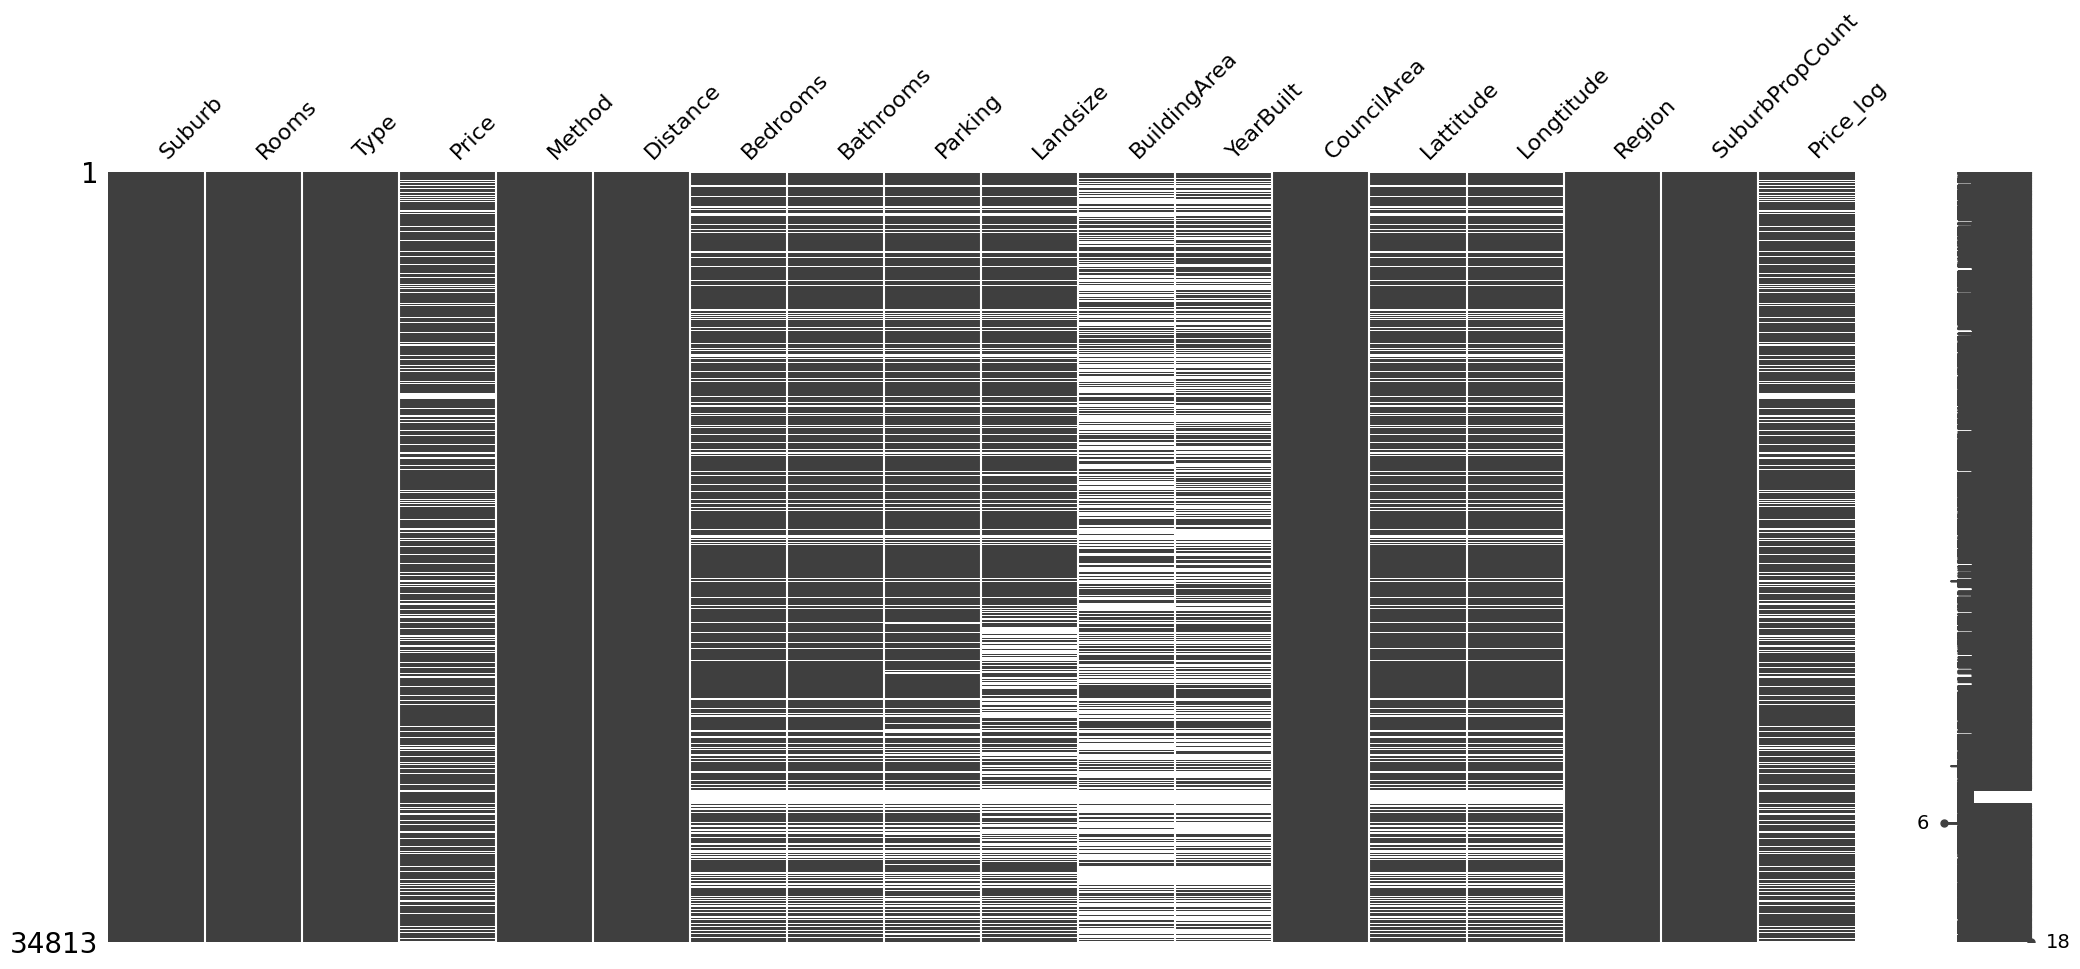

In [6]:
import missingno as msno
msno.matrix(df_loaded)

In [7]:
df =df_loaded


In [20]:
import numpy as np

BA_mean = df['BuildingArea'].mean()
df['BuildingArea'].replace(to_replace=np.nan, value=BA_mean, inplace=True)
df['BuildingArea'].isnull().sum()

/tmp/ipykernel_185355/3854894113.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BuildingArea'].replace(to_replace=np.nan, value=BA_mean, inplace=True)


0

In [23]:
#second part saving...
from azureml.core import Workspace, Datastore
ws = Workspace.from_config()
datastore = Datastore.get(ws, "reviewthebookdatastore")

Dataset.Tabular.register_pandas_dataframe(
  dataframe = df,
  target = datastore,
  name ='Melbourne Housing Dataset Edited',
  description = 'Data Cleansing 2 - replcing some missing values')

Validating arguments.
Arguments validated.
Validating arguments.
Arguments validated.
'overwrite' is set to True. Any file already present in the target will be overwritten.
Uploading files from '/tmp/tmpdsp0r7qh' to 'managed-dataset/e325d26a-74e2-493e-9372-b2b53279988d/'
Copying 1 files with concurrency set to 1
Copied /tmp/tmpdsp0r7qh/dataframe.parquet, file 1 out of 1. Destination path: https://reviewthebook.blob.core.windows.net/bookfiles/managed-dataset/e325d26a-74e2-493e-9372-b2b53279988d/dataframe.parquet
Files copied=1, skipped=0, failed=0
Successfully uploaded file to datastore.
Creating and registering a new dataset.
Successfully created and registered a new dataset.


{
  "definition": "EnginelessDataflow:\n---\ntype: mltable\npaths:\n  - pattern: \"azureml://subscriptions/d7a578a6-ad8a-4139-a8e5-b11a9cc35c10/resourcegroups/book_rg/workspaces/book_ws/datastores/reviewthebookdatastore/paths/managed-dataset/e325d26a-74e2-493e-9372-b2b53279988d/\"\ntransformations:\n  - read_parquet:\n      path_column: Path\n      include_path_column: false\nmetadata:\n  infer_column_types: \"False\"\n",
  "registration": {
    "id": "ad10b30d-2a01-4a4d-8165-373de0664a96",
    "name": "Melbourne Housing Dataset Edited",
    "version": 2,
    "description": "Data Cleansing 2 - replcing some missing values",
    "workspace": "Workspace.create(name='book_ws', subscription_id='d7a578a6-ad8a-4139-a8e5-b11a9cc35c10', resource_group='book_rg')"
  }
}

In [ ]:
# # compute the correlation matrix
# corr = df.corr()

# # generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=np.bool))
# # set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))
# # generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# # draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plt.show()

ValueError: could not convert string to float: 'Abbotsford'

In [24]:
obj_df = df.select_dtypes(include=[object]).copy()
obj_df.head()

,Suburb,Type,Method,CouncilArea,Region
0,Abbotsford,house,SS,Yarra City Council,Northern Metropolitan
1,Abbotsford,house,Property Sold,Yarra City Council,Northern Metropolitan
2,Abbotsford,house,Property Sold,Yarra City Council,Northern Metropolitan
3,Abbotsford,unit,Vendor Bid,Yarra City Council,Northern Metropolitan
4,Abbotsford,house,Property Sold Prior,Yarra City Council,Northern Metropolitan


In [26]:
# Let's convert all columns in the object dataframe to the "categorical" datatype
for cl in obj_df.columns:
    obj_df[cl] = obj_df[cl].astype('category')
    
obj_df.dtypes

Suburb         category
Type           category
Method         category
CouncilArea    category
Region         category
dtype: object

In [27]:
for cl in obj_df.columns:
    obj_df[cl+"_cat"] = obj_df[cl].cat.codes
obj_df.head()

,Suburb,Type,Method,CouncilArea,Region,Suburb_cat,Type_cat,Method_cat,CouncilArea_cat,Region_cat
0,Abbotsford,house,SS,Yarra City Council,Northern Metropolitan,0,0,5,31,2
1,Abbotsford,house,Property Sold,Yarra City Council,Northern Metropolitan,0,0,2,31,2
2,Abbotsford,house,Property Sold,Yarra City Council,Northern Metropolitan,0,0,2,31,2
3,Abbotsford,unit,Vendor Bid,Yarra City Council,Northern Metropolitan,0,2,7,31,2
4,Abbotsford,house,Property Sold Prior,Yarra City Council,Northern Metropolitan,0,0,3,31,2


In [31]:
# Now we will incorporate the numbered versions of our categorical data into a new dataframe
column_replacement = {'Type':'Type_cat','Suburb':'Suburb_cat','Method':'Method_cat','CouncilArea':'CouncilArea_cat','Region':'Region_cat'}
cont_df = df.copy()
for key in column_replacement:
    cont_df[key] = obj_df[column_replacement[key]]
cont_df.dtypes

Suburb               int16
Rooms                int64
Type                  int8
Price              float64
Method                int8
Distance           float64
Bedrooms           float64
Bathrooms          float64
Parking            float64
Landsize           float64
BuildingArea       float64
YearBuilt          float64
CouncilArea           int8
Lattitude          float64
Longtitude         float64
Region                int8
SuburbPropCount    float64
Price_log          float64
dtype: object

In [33]:
from pandas.api.types import is_float_dtype

for cl in cont_df.columns:
    if (
        is_float_dtype(cont_df[cl])
        and cl not in ['Lattitude', 'Longtitude', 'Price_log', 'Distance']
    ):
        cont_df[cl] = cont_df[cl].round().astype("Int64")  # capital I


/tmp/ipykernel_185355/110067968.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


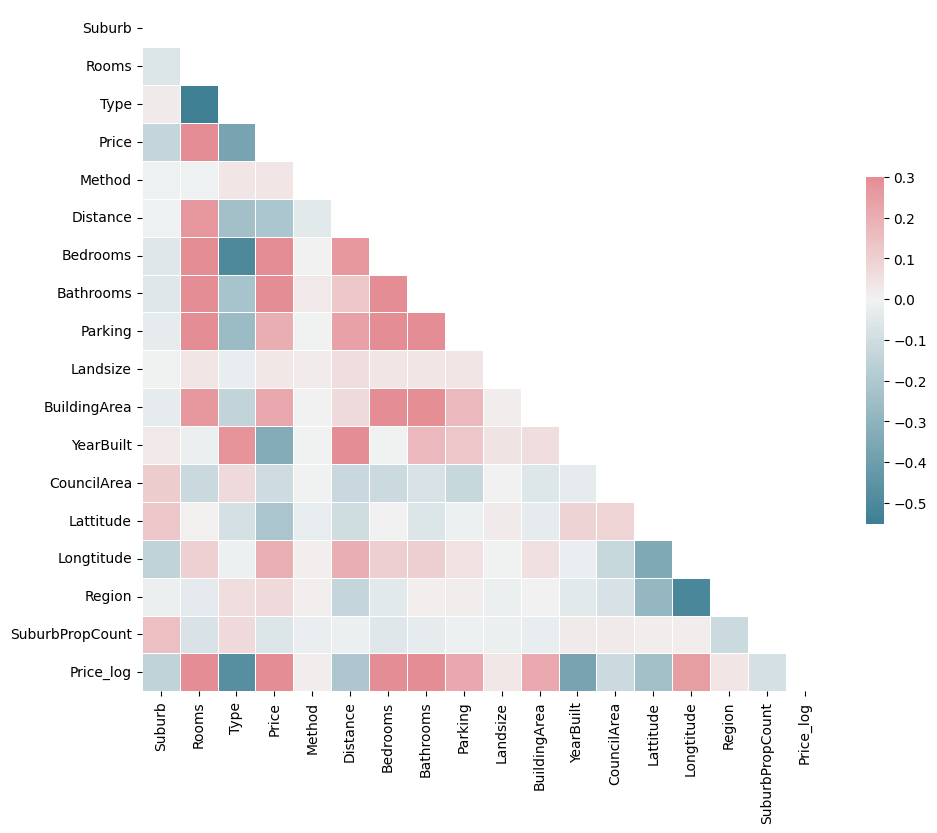

In [35]:
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
# Let us do the correlation again
# Compute the correlation matrix
corr = cont_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [43]:
ignored_col = ['Price', 'Price_log', 'Date']
cols = [c for c in cont_df.columns if c not in ignored_col]

mask = cont_df['Price'].notna()
X = cont_df[cols][mask]
y = cont_df['Price'][mask]

from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor(
    n_estimators=250,
    criterion='squared_error',
    random_state=0,
    max_depth=10
)
forest.fit(X, y)
importances = forest.feature_importances_


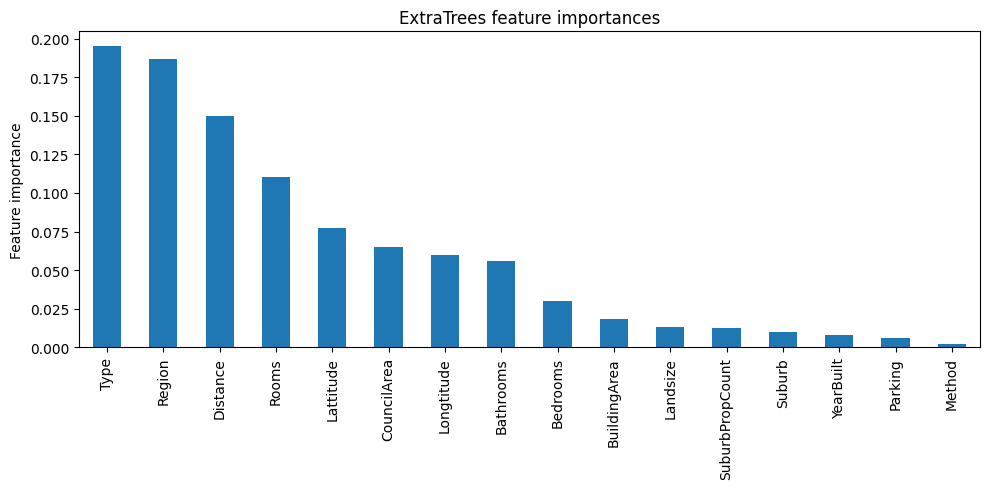

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

imp_series = pd.Series(importances, index=cols).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
imp_series.plot(kind="bar")
plt.ylabel("Feature importance")
plt.title("ExtraTrees feature importances")
plt.tight_layout()
plt.show()


In [45]:
fig = px.box(df, y="Price_log",x='Type', color = 'Type', 
                 category_orders={"Type": ["house", "townhouse", "unit"]})
fig.show()

## P 207: Track the figures

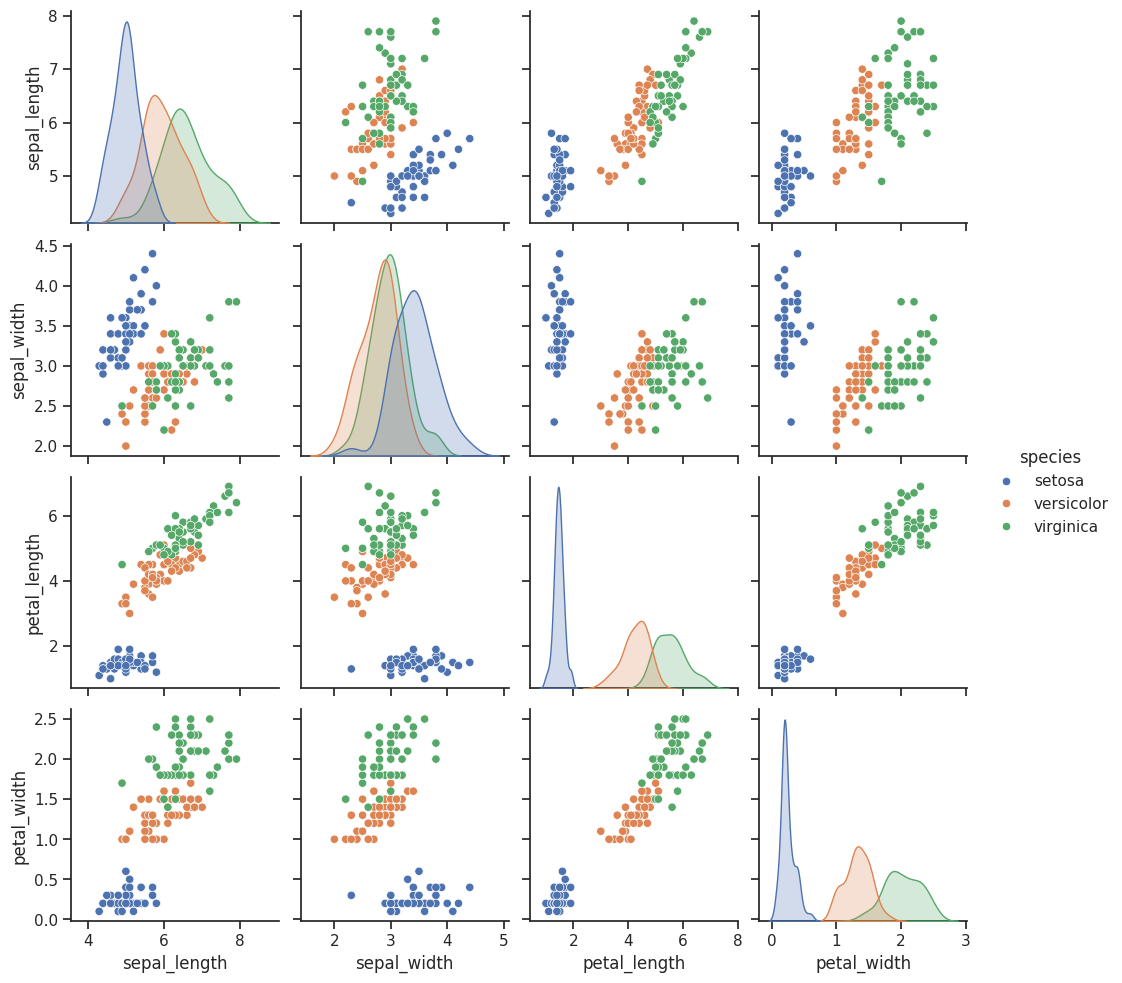

In [1]:
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

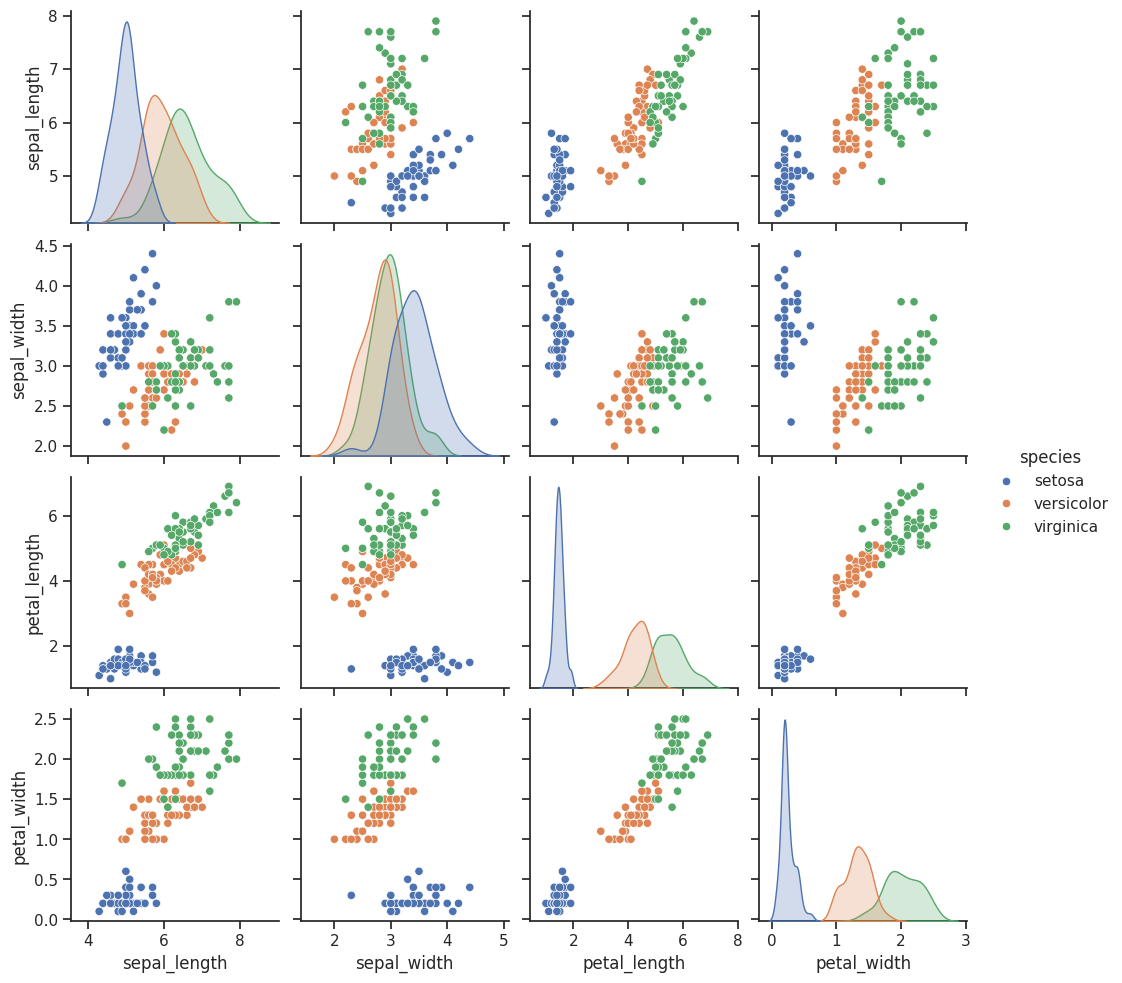

In [3]:
from azureml.core import Workspace, Experiment
ws = Workspace.from_config()

exp = Experiment(ws,name="log_the_figures")

with exp.start_logging() as run:
    fig = sns.pairplot(df,hue="species")
    run.log_image(name="Pairplot of Iris", plot=fig)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("iris")

with exp.start_logging() as run:
    plt.figure(figsize=(6, 4))           # create a figure explicitly
    ax = sns.scatterplot(
        data=df,
        x="petal_length",
        y="petal_width",
        hue="species"
    )
    fig = ax.get_figure()                # convert Axes -> Figure
    run.log_image(name="Single plot", plot=fig)
    plt.close(fig)                       # optional: free memory